**Install and Import Required Libraries**

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

**Download and Explore the Dataset**

In [ ]:
import kagglehub

dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')
dataset_path = os.path.join(dataset, "animals", "animals")
images_path = os.path.join(dataset, "images")
print(os.listdir(dataset_path))

categories = os.listdir(dataset_path)
print("Categories:", categories)

for category in categories:
    print(f"{category}: {os.listdir(os.path.join(dataset_path, category))[:5]}")


['dogs', 'panda', 'cats']
Categories: ['dogs', 'panda', 'cats']
dogs: ['dogs_00583.jpg', 'dogs_00683.jpg', 'dogs_00750.jpg', 'dogs_00652.jpg', 'dogs_00895.jpg']
panda: ['panda_00716.jpg', 'panda_00296.jpg', 'panda_00830.jpg', 'panda_00540.jpg', 'panda_00089.jpg']
cats: ['cats_00850.jpg', 'cats_00272.jpg', 'cats_00101.jpg', 'cats_00694.jpg', 'cats_00725.jpg']


**Load and Preprocess Images (Grayscale + Resize)**

In [ ]:
for category in categories:
    print(f"{category}: {os.listdir(os.path.join(dataset_path, category))[:5]}")

for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset_path, category)
    images = os.listdir(path)
    random.shuffle(images)

    for img in images[:100]:
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)

        if img_bgr is not None:
            img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
            img_gray = cv2.resize(img_gray, (100, 100))
            train_data.append([img_gray, label])
        else:
            print(f"Failed to load image: {img_path}")

np.random.shuffle(train_data)
print("Sample labels after shuffle:", [train_data[i][1] for i in range(10)])

dogs: ['dogs_00583.jpg', 'dogs_00683.jpg', 'dogs_00750.jpg', 'dogs_00652.jpg', 'dogs_00895.jpg']
panda: ['panda_00716.jpg', 'panda_00296.jpg', 'panda_00830.jpg', 'panda_00540.jpg', 'panda_00089.jpg']
cats: ['cats_00850.jpg', 'cats_00272.jpg', 'cats_00101.jpg', 'cats_00694.jpg', 'cats_00725.jpg']
Sample labels after shuffle: [1, 1, 0, 2, 2, 1, 1, 2, 0, 0]


**Visualize a Few Samples**

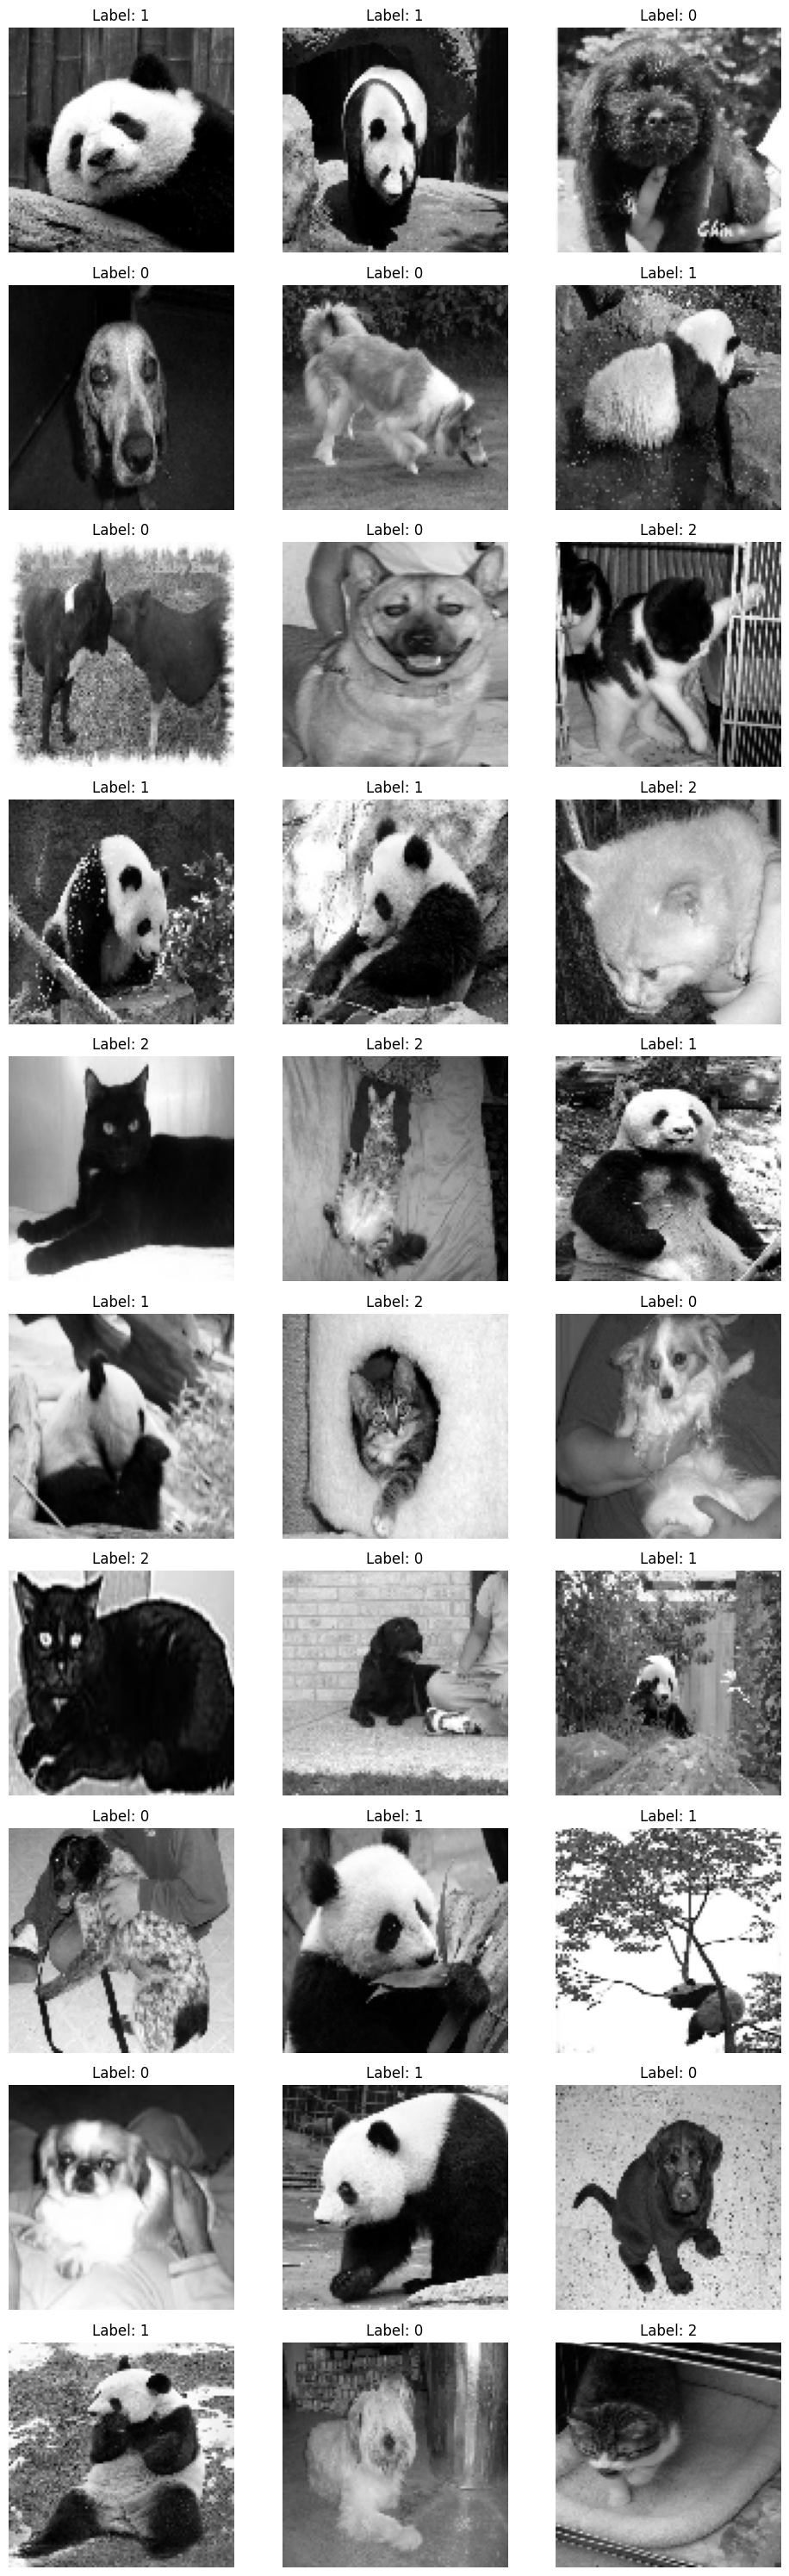

In [ ]:
fig, axes = plt.subplots(10, 3, figsize=(10, 30))

for i, ax in enumerate(axes.flat):
    img_array, label = train_data[i]
    ax.imshow(img_array, cmap="gray")
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

**Split Into 5 Folds for Cross-Validation**

In [ ]:
folds = []
for i in range(5):
    folds.append(train_data[i::5])
print(f"Total folds: {len(folds)}")

Total folds: 5


**Define Distance Functions**

In [ ]:
def l2_distance(valid_img, train_img):
    return np.sqrt(np.sum(np.square(valid_img - train_img)))

def l1_distance(valid_img, train_img):
    return np.sum(np.abs(valid_img - train_img))

**Define KNN Prediction Function**

In [ ]:
def knn_prediction(distances, k=1):
    nearest_neighbors = distances[:k]
    labels = [label for _, label in nearest_neighbors]
    label_counts = Counter(labels)
    return label_counts.most_common(1)[0][0]

**Cross-Validation for L2 (Euclidean)**

In [ ]:
fold_accuracies_2 = []
avg_accuracies_2 = []

for k in range(1, 31):
    accuracies = []
    for i in range(len(folds)):
        valid_set = folds[i]
        train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]
        predictions = []

        for valid_img in valid_set:
            distances = [(l2_distance(valid_img[0], train_img[0]), train_img[1]) for train_img in train_set]
            distances.sort()
            pred_label = knn_prediction(distances, k)
            predictions.append(1 if pred_label == valid_img[1] else 0)

        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    fold_accuracies_2.append(accuracies)
    avg_accuracies_2.append(sum(accuracies) / len(accuracies))
    print(f"K = {k}, Avg Accuracy (L2): {avg_accuracies_2[-1]:.2f}")


K = 1, Avg Accuracy (L2): 0.44
K = 2, Avg Accuracy (L2): 0.44
K = 3, Avg Accuracy (L2): 0.44
K = 4, Avg Accuracy (L2): 0.45
K = 5, Avg Accuracy (L2): 0.46
K = 6, Avg Accuracy (L2): 0.48
K = 7, Avg Accuracy (L2): 0.48
K = 8, Avg Accuracy (L2): 0.47
K = 9, Avg Accuracy (L2): 0.49
K = 10, Avg Accuracy (L2): 0.50
K = 11, Avg Accuracy (L2): 0.50
K = 12, Avg Accuracy (L2): 0.50
K = 13, Avg Accuracy (L2): 0.49
K = 14, Avg Accuracy (L2): 0.50
K = 15, Avg Accuracy (L2): 0.49
K = 16, Avg Accuracy (L2): 0.49
K = 17, Avg Accuracy (L2): 0.50
K = 18, Avg Accuracy (L2): 0.49
K = 19, Avg Accuracy (L2): 0.49
K = 20, Avg Accuracy (L2): 0.51
K = 21, Avg Accuracy (L2): 0.50
K = 22, Avg Accuracy (L2): 0.49
K = 23, Avg Accuracy (L2): 0.49
K = 24, Avg Accuracy (L2): 0.51
K = 25, Avg Accuracy (L2): 0.50
K = 26, Avg Accuracy (L2): 0.51
K = 27, Avg Accuracy (L2): 0.50
K = 28, Avg Accuracy (L2): 0.50
K = 29, Avg Accuracy (L2): 0.50
K = 30, Avg Accuracy (L2): 0.49


**Cross-Validation for L1 (Manhattan)**

In [ ]:
fold_accuracies_1 = []
avg_accuracies_1 = []

for k in range(1, 31):
    accuracies = []
    for i in range(len(folds)):
        valid_set = folds[i]
        train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]
        predictions = []

        for valid_img in valid_set:
            distances = [(l1_distance(valid_img[0], train_img[0]), train_img[1]) for train_img in train_set]
            distances.sort()
            pred_label = knn_prediction(distances, k)
            predictions.append(1 if pred_label == valid_img[1] else 0)

        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    fold_accuracies_1.append(accuracies)
    avg_accuracies_1.append(sum(accuracies) / len(accuracies))
    print(f"K = {k}, Avg Accuracy (L1): {avg_accuracies_1[-1]:.2f}")


K = 1, Avg Accuracy (L1): 0.29
K = 2, Avg Accuracy (L1): 0.29
K = 3, Avg Accuracy (L1): 0.33
K = 4, Avg Accuracy (L1): 0.32
K = 5, Avg Accuracy (L1): 0.36
K = 6, Avg Accuracy (L1): 0.36
K = 7, Avg Accuracy (L1): 0.38
K = 8, Avg Accuracy (L1): 0.39
K = 9, Avg Accuracy (L1): 0.40
K = 10, Avg Accuracy (L1): 0.39
K = 11, Avg Accuracy (L1): 0.40
K = 12, Avg Accuracy (L1): 0.40
K = 13, Avg Accuracy (L1): 0.42
K = 14, Avg Accuracy (L1): 0.40
K = 15, Avg Accuracy (L1): 0.41
K = 16, Avg Accuracy (L1): 0.40
K = 17, Avg Accuracy (L1): 0.41
K = 18, Avg Accuracy (L1): 0.41
K = 19, Avg Accuracy (L1): 0.43
K = 20, Avg Accuracy (L1): 0.43
K = 21, Avg Accuracy (L1): 0.42
K = 22, Avg Accuracy (L1): 0.41
K = 23, Avg Accuracy (L1): 0.40
K = 24, Avg Accuracy (L1): 0.42
K = 25, Avg Accuracy (L1): 0.42
K = 26, Avg Accuracy (L1): 0.41
K = 27, Avg Accuracy (L1): 0.43
K = 28, Avg Accuracy (L1): 0.42
K = 29, Avg Accuracy (L1): 0.41
K = 30, Avg Accuracy (L1): 0.43


**Plot the Accuracy Results**

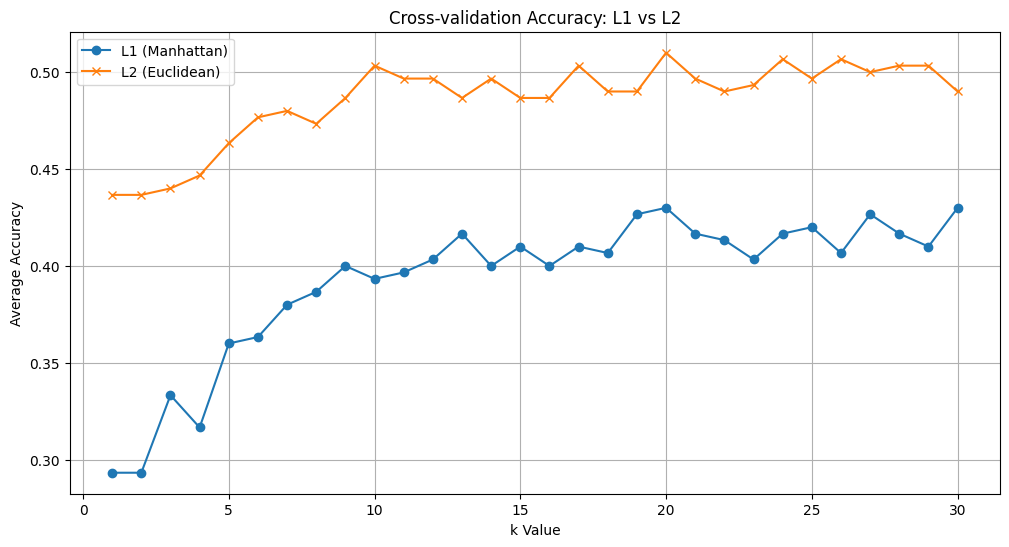

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 31), avg_accuracies_1, label='L1 (Manhattan)', marker='o')
plt.plot(range(1, 31), avg_accuracies_2, label='L2 (Euclidean)', marker='x')

plt.xlabel('k Value')
plt.ylabel('Average Accuracy')
plt.title('Cross-validation Accuracy: L1 vs L2')
plt.grid(True)
plt.legend()
plt.show()

**The discussion highlights that for this specific grayscale dataset, the KNN algorithm using Euclidean (L2) distance generally achieves higher average cross-validation accuracy compared to Manhattan (L1) distance, particularly for larger values of k (around k=20). This suggests L2 distance might better capture feature relationships for this data. The difference in performance could be attributed to the dataset's characteristics, the nature of its features, and the complexity of the classes. The discussion also points out limitations, such as relying solely on average accuracy, and suggests potential improvements like exploring other performance metrics, fine-tuning k, and investigating different data preprocessing or feature engineering techniques.**

**Top 5 Predictions (Final Result)**


Top 5 Predictions:



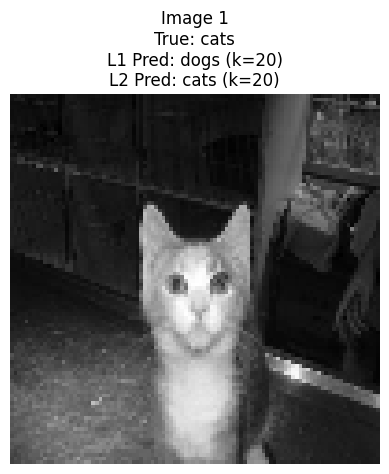

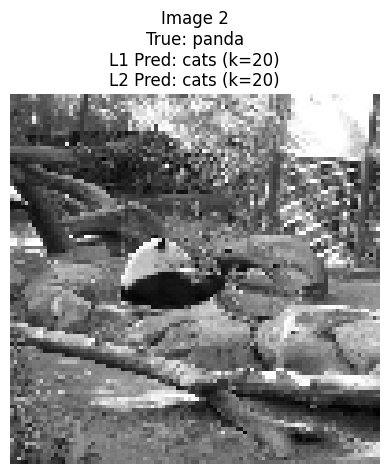

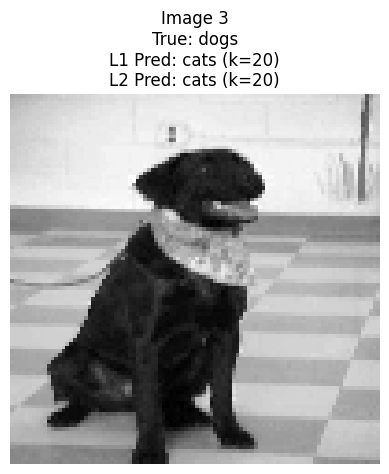

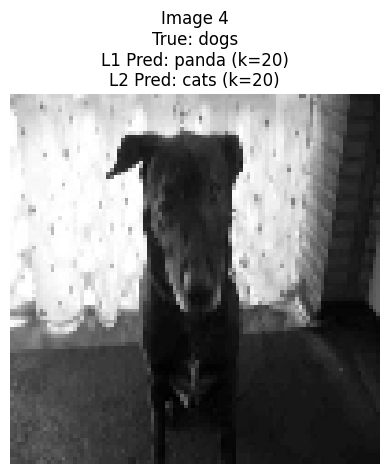

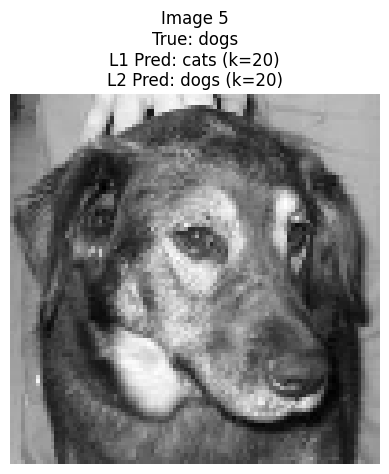

In [ ]:
X = np.array([item[0] for item in train_data])
y = np.array([item[1] for item in train_data])

best_k_l1 = np.argmax(avg_accuracies_1) + 1
best_k_l2 = np.argmax(avg_accuracies_2) + 1
int_to_label = {i: category for i, category in enumerate(categories)}

def knn_predict(X_train, y_train, x_query, k, dist_func):
    distances = [(dist_func(x_query, x_train), label) for x_train, label in zip(X_train, y_train)]
    distances.sort()
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]

random.seed(123)
test_indices = random.sample(range(len(X)), 5)
X_test = X[test_indices]
y_test = y[test_indices]

print("\nTop 5 Predictions:\n")

for i, (x, true_label) in enumerate(zip(X_test, y_test)):
    pred_l1 = knn_predict(X, y, x, k=best_k_l1, dist_func=l1_distance)
    pred_l2 = knn_predict(X, y, x, k=best_k_l2, dist_func=l2_distance)

    fig, ax = plt.subplots()
    ax.imshow(x, cmap='gray')
    ax.axis('off')
    ax.set_title(
        f"Image {i+1}\n"
        f"True: {int_to_label[true_label]}\n"
        f"L1 Pred: {int_to_label[pred_l1]} (k={best_k_l1})\n"
        f"L2 Pred: {int_to_label[pred_l2]} (k={best_k_l2})"
    )
    plt.show()
